<a href="https://colab.research.google.com/github/JuIsa/Book-Analysis/blob/main/BookAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk

In [ ]:
words = ['plays','play','playing','player','pharmacies','badly']
nltk.download('wordnet')
lemma = WordNetLemmatizer()
print([lemma.lemmatize(word) for word in words])

[nltk_data] Downloading package wordnet to /root/nltk_data...


['play', 'play', 'playing', 'player', 'pharmacy', 'badly']


# Importing file

In [ ]:
text = ''
with open('/content/drive/MyDrive/1840.txt', 'r') as f:
  text = f.read()

In [ ]:
text = text[613:]

In [ ]:
text[:30]

'Chapter I\n\nThe Philadelphia in'

# Cleaning

In [ ]:
text = text.replace('\n',' ').replace("'ll",' will').replace("'s",'')
text[:30]

'Chapter I  The Philadelphia in'

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
pdText = pd.Series(text.split())

In [ ]:
pdText

0              Chapter
1                    I
2                  The
3         Philadelphia
4                 into
              ...     
196700              to
196701            hear
196702           about
196703             new
196704         eBooks.
Length: 196705, dtype: object

In [ ]:

chaptersIdx = pdText[pdText=='Chapter'].index
chaptersIdx

Int64Index([     0,   2014,   4731,   8443,  10623,  12339,  15737,  18165,
             19835,  20796,  24046,  26894,  29734,  32867,  37388,  39718,
             42044,  45996,  48752,  50653,  53172,  57330,  60867,  65869,
             67543,  77562,  81911,  85156,  87852,  90665,  92804,  94376,
             97350, 101505, 104266, 107548, 112287, 116405, 120720, 123072,
            125287, 128708, 131659, 139092, 142163, 143887, 148537, 151014,
            153792, 156600, 158659, 159707, 163890, 170198, 174915, 178818,
            182619, 186276, 189618],
           dtype='int64')

In [ ]:
lastCh = pdText[pdText=='Gutenberg']
lastCh

193782    Gutenberg
193915    Gutenberg
194312    Gutenberg
194399    Gutenberg
194669    Gutenberg
195157    Gutenberg
195199    Gutenberg
195216    Gutenberg
195394    Gutenberg
195421    Gutenberg
195529    Gutenberg
196090    Gutenberg
196115    Gutenberg
196145    Gutenberg
196151    Gutenberg
196202    Gutenberg
196308    Gutenberg
196526    Gutenberg
196681    Gutenberg
dtype: object

In [ ]:
pdText.iloc[193344]

'its'

In [ ]:
chapters=[]
for i in range(len(chaptersIdx)-1):
  start = chaptersIdx[i]
  end = chaptersIdx[i+1]
  chapters.append(pdText[start:end])
chapters.append(pdText[chaptersIdx[-1]:193344])
len(chapters)

59

In [ ]:
chapters[-1]

189618      Chapter
189619          LIX
189620          The
189621      banking
189622        house
            ...    
193339        great
193340    subtlety,
193341          the
193342        power
193343           of
Length: 3726, dtype: object

In [ ]:
print(lemma.lemmatize('banking'))
print(lemma.lemmatize('Chapter')==lemma.lemmatize('chapter'))
print(lemma.lemmatize('"Hello"')==lemma.lemmatize('Hello'))
print(lemma.lemmatize('end?')==lemma.lemmatize('end'))
print(lemma.lemmatize('yesterday!')==lemma.lemmatize('yesterday'))
print(lemma.lemmatize('here')==lemma.lemmatize('here,'))
print(lemma.lemmatize('news')==lemma.lemmatize('news.'))
print(lemma.lemmatize("I'll")==lemma.lemmatize('I will'))
print(lemma.lemmatize("mornin'")==lemma.lemmatize('morning'))
print(lemma.lemmatize('Theodore'))
print(lemma.lemmatize('was'))
print(lemma.lemmatize('looks'))
print('123'.isdigit())
print(lemma.lemmatize('20th'))

banking
False
False
False
False
False
False
False
False
Theodore
wa
look
True
20th


In [ ]:
for i in range(len(chapters)):
  chapters[i] = chapters[i].str.replace('[^\w\s]','').replace("in'",'ing')

<ipython-input-16-115f029cc5c8>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  chapters[i] = chapters[i].str.replace('[^\w\s]','').replace("in'",'ing')


In [ ]:
chapters[0].str.endswith(',').sum()

0

In [ ]:
chapters = [ch.str.lower() for ch in chapters]

In [ ]:
print(len(chapters[3]),len(chapters[15]),len(chapters[32]))

2180 2326 4155


In [ ]:
filtered_chapters = []
for ch in chapters:
  filtered_chapters.append(ch[ch.apply(lambda word: not word.isdigit())]) # remove "pure" figits
print(len(filtered_chapters[3]),len(filtered_chapters[15]),len(filtered_chapters[32]))

2180 2326 4147


# Basic Visuals

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Number of Words')

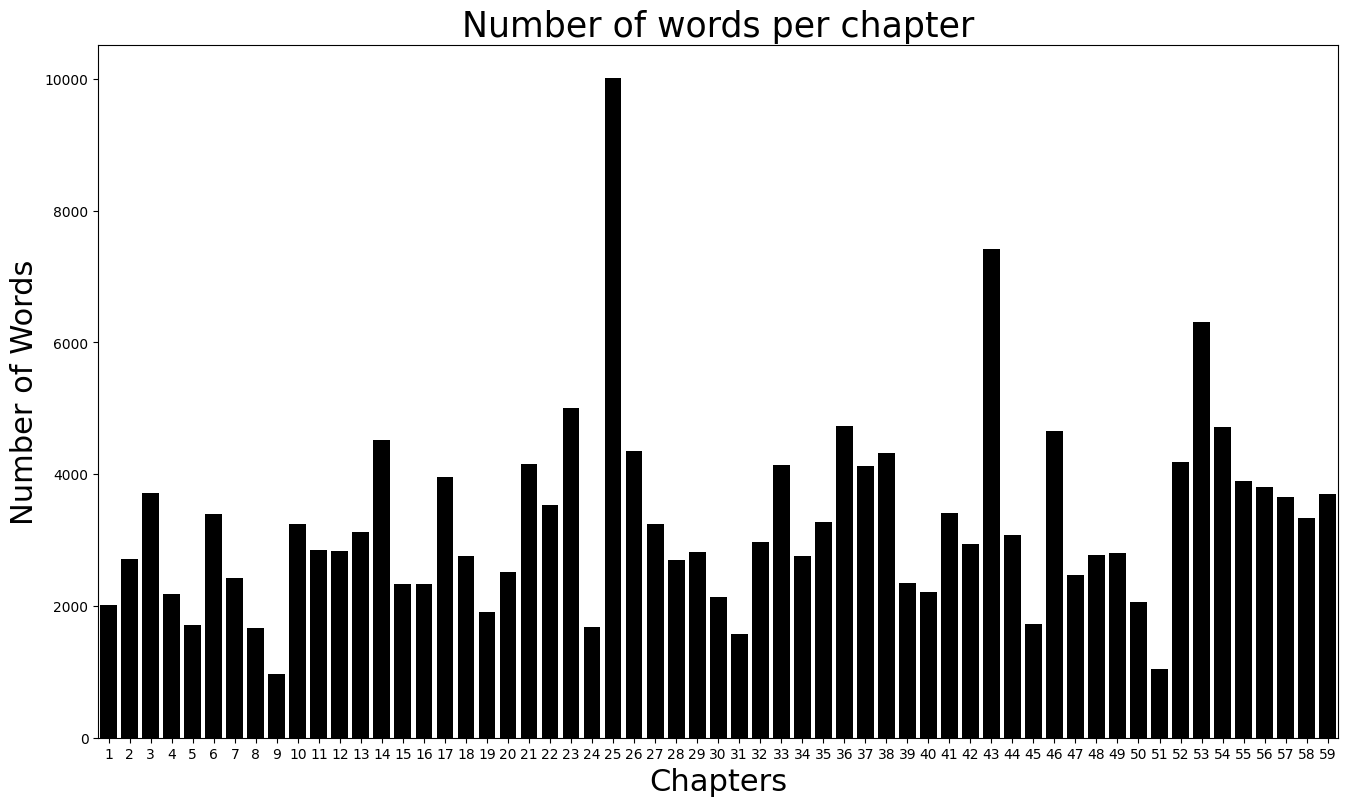

In [ ]:
x = list(range(1,60))
y = [len(ch) for ch in filtered_chapters]
plt.figure(figsize=(16,9))
sns.barplot(x=x,y=y,color='black')
plt.title('Number of words per chapter',fontsize=25)
plt.xlabel('Chapters', fontsize=22)
plt.ylabel('Number of Words',fontsize=22)

In [ ]:
unq_words = []
for i, ch in enumerate(filtered_chapters):
  uw = {lemma.lemmatize(word) for word in ch}
  unq_words.append(uw)
len(unq_words[0])

741

Text(0, 0.5, 'Number of Words')

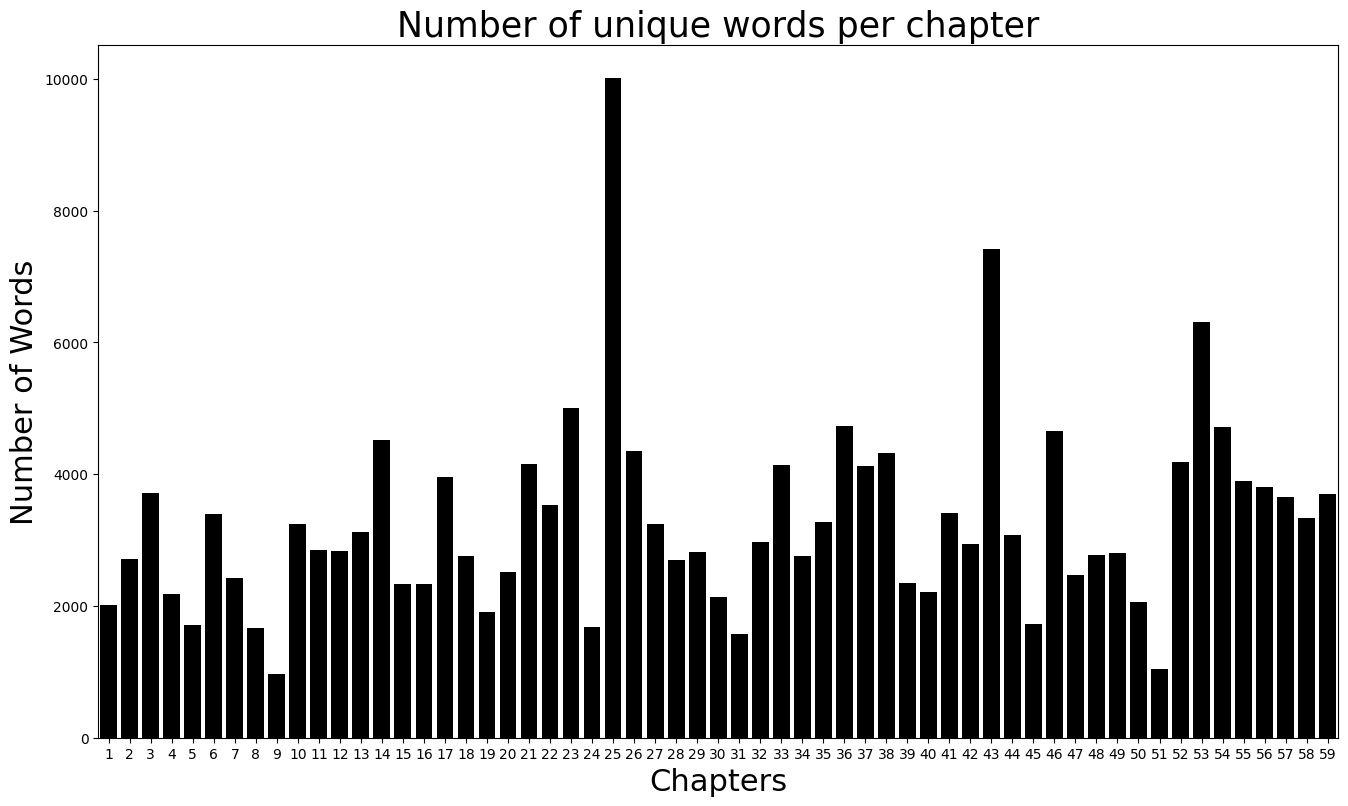

In [ ]:
y2 = [len(x) for x in unq_words]
plt.figure(figsize=(16,9))
sns.barplot(x=x,y=y,color='black')
plt.title('Number of unique words per chapter',fontsize=25)
plt.xlabel('Chapters', fontsize=22)
plt.ylabel('Number of Words',fontsize=22)

<ipython-input-25-c9d77c8fbba1>:12: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legends.legendHandles[0].set_color('cyan')


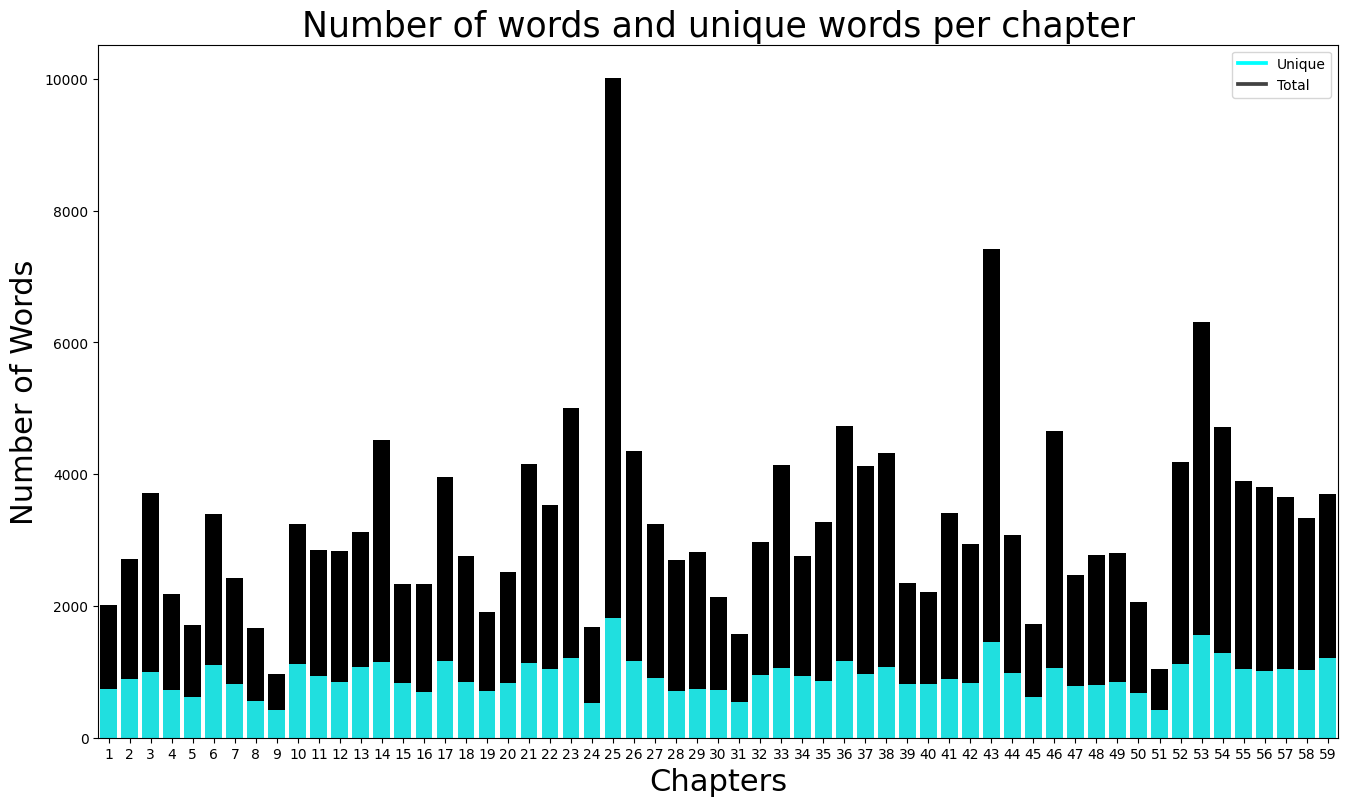

In [ ]:

plt.figure(figsize=(16,9))
sns.barplot(x=x,y=y,color='black')
# plt.legend(['word1'])
sns.barplot(x=x,y=y2,color='cyan')
# plt.legend(['word2'])
plt.title('Number of words and unique words per chapter',fontsize=25)
plt.xlabel('Chapters', fontsize=22)
plt.ylabel('Number of Words',fontsize=22)
plt.legend(labels=['Unique','Total'])
fig = plt.gca()
legends = fig.get_legend()
legends.legendHandles[0].set_color('cyan')

In [ ]:
count_words = {}
for chapter in chapters:
  for word in chapter:
    t = lemma.lemmatize(word)
    t = t if t!='wa' else 'was'
    if t in count_words:
      count_words[t]+=1
    else:
      count_words[t]=1

In [ ]:
count_words = sorted(count_words.items(), key=lambda x:x[1],reverse=True)

In [ ]:
count_words[10:30]

[('his', 2612),
 ('had', 1991),
 ('you', 1989),
 ('i', 1931),
 ('for', 1664),
 ('not', 1662),
 ('her', 1546),
 ('be', 1398),
 ('this', 1390),
 ('him', 1389),
 ('she', 1346),
 ('cowperwood', 1306),
 ('with', 1289),
 ('at', 1249),
 ('on', 1036),
 ('but', 1033),
 ('would', 1027),
 ('were', 994),
 ('so', 899),
 ('have', 868)]

In [ ]:
new_unq_words_total = list(unq_words[0])
new_unq_words = [unq_words[0]]
for i in range(1,len(unq_words)):
  t = []
  for word in unq_words[i]:
    if word not in new_unq_words_total:
      t.append(word)
      new_unq_words_total.append(word)
  new_unq_words.append(pd.Series(t))


In [ ]:
len(new_unq_words_total)

11624

In [ ]:
count_unq_words = [len(unq) for unq in new_unq_words]

Text(0.5, 0, 'Chapters')

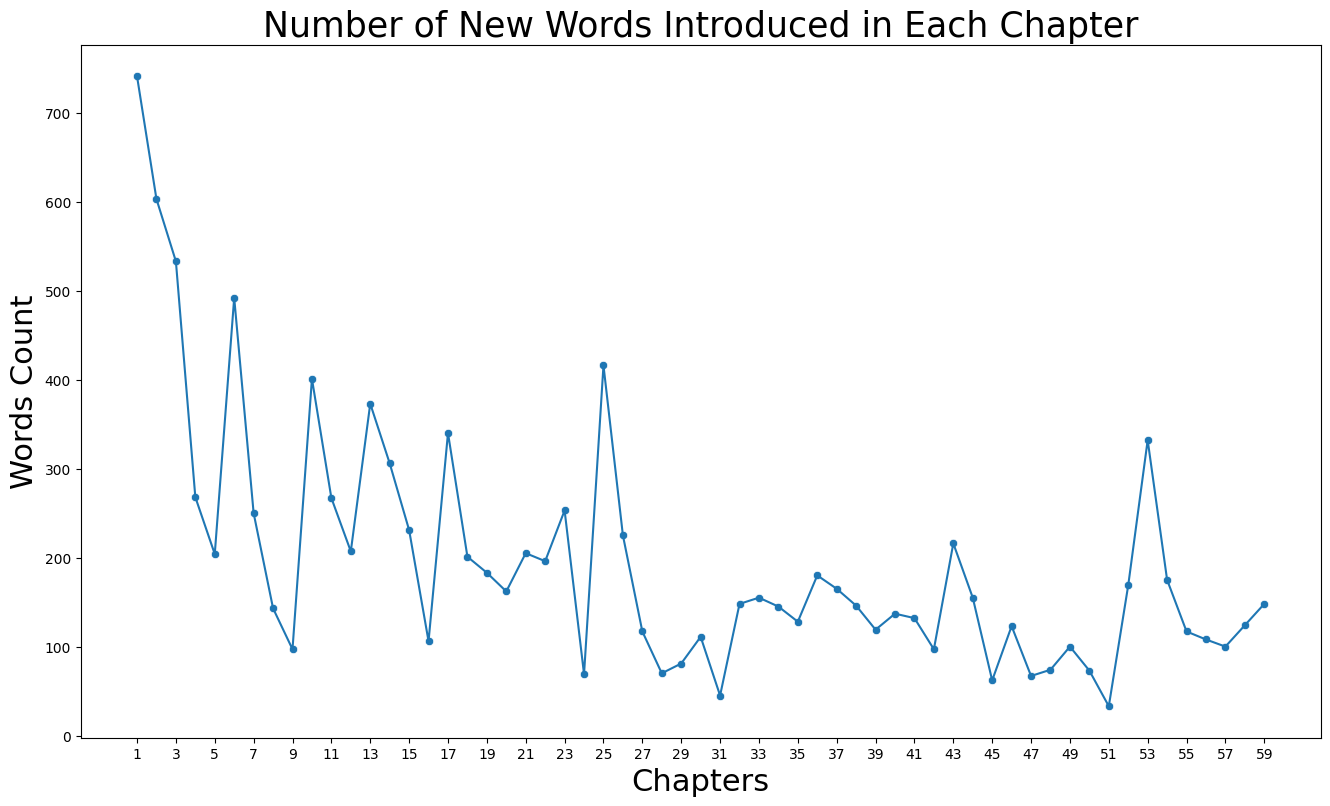

In [ ]:
plt.figure(figsize=(16,9))
sns.lineplot(x=x,y=count_unq_words)
sns.scatterplot(x=x,y=count_unq_words)
ticks=plt.xticks(list(range(1,60,2)))
plt.title('Number of New Words Introduced in Each Chapter', fontsize=25)
plt.ylabel('Words Count', fontsize=22)
plt.xlabel('Chapters', fontsize=22)

In [ ]:
new_unq_words[32].tail(30)

125           falsity
126            headed
127             shady
128      respectfully
129       delinquency
130             title
131            rotten
132    politiciansher
133     committeehall
134            lessen
135     complimentary
136    hypothecations
137           theythe
138              21st
139             bland
140            dothat
141         fieryeyed
142          positive
143          courtesy
144       manipulated
145          beginner
146           presume
147         emphasize
148      somethingshe
149          appended
150          assigned
151           affably
152           joining
153           evasive
154            editor
dtype: object

# Indexes

Gunning fog index


In [ ]:
text100 = pdText[680:780]
text100

680            Mrs.
681      Cowperwood
682             was
683              of
684               a
           ...     
775            ten,
776             was
777               a
778    natural-born
779         leader.
Length: 100, dtype: object

In [ ]:
sntnc = text100[text100.str.endswith('.')].index
len(sntnc) 

4

In [ ]:
avg_stn_len = len(text100)/len(sntnc)
avg_stn_len

25.0

In [ ]:
# complex_words = 0
# for word in text100:
#   if len(word.replace('[^\w\s]',''))>6:
#     complex_words+=int(input(word))


In [ ]:
#15 complex words
complex_words = 15

In [ ]:
gunning = 0.4*(avg_stn_len+100*complex_words/len(text100))
gunning

16.0

 Flesch Kincaid

In [ ]:
fk = 206.835- 1.015*(avg_stn_len)-84.6*complex_words/len(text100)
fk

168.77

# Parts of speech


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
for t in ['or','there','but','not','and','was','is']:
  text = nltk.word_tokenize(t)
  res = nltk.pos_tag(text)
  print(t,res[0][1])


or CC
there RB
but CC
not RB
and CC
was VBD
is VBZ


In [ ]:
pdText[10]

'born'

https://stackoverflow.com/questions/15388831/what-are-all-possible-pos-tags-of-nltk

# Words combo graph 

In [ ]:
moneyIdx = pdText[pdText.str.contains('money')].index
moneyIdx

Int64Index([   522,   1986,   2388,   2404,   2469,   5082,   5323,   5419,
              5565,   5815,
            ...
            185811, 185862, 188255, 190727, 191285, 192275, 192467, 195228,
            195308, 195660],
           dtype='int64', length=310)

In [ ]:
premoney = []
for idx in moneyIdx:
  if not pdText[idx-1].endswith('.') and not pdText[idx-1].endswith(',') and not pdText[idx].endswith('?') and not pdText[idx].endswith('!') and not pdText[idx].endswith('"'): 
    combo = (pdText[idx-1].replace(',','').replace('.',''),'money')#pdText[idx]
    premoney.append(combo)
premoney = list(set(premoney))

In [ ]:
postmoney = []
for idx in moneyIdx:
  if not pdText[idx].endswith('.') and not pdText[idx].endswith(',') and not pdText[idx].endswith('?') and not pdText[idx].endswith('!') and not pdText[idx].endswith('"'):
    combo = ('money',pdText[idx+1].replace('.','',).replace(',',''))#pdText[idx]
    postmoney.append(combo)
postmoney = list(set(postmoney))

In [ ]:
import networkx as nx

all_money = []
for i in range(max(len(premoney),len(postmoney))):
  if i<len(premoney):
    all_money.append(premoney[i])
  if i<len(postmoney):
    all_money.append(postmoney[i])
graphpre = nx.DiGraph()
graphpre.add_edges_from(premoney)
graphpost = nx.DiGraph()
graphpost.add_edges_from(postmoney)

<Figure size 640x480 with 0 Axes>

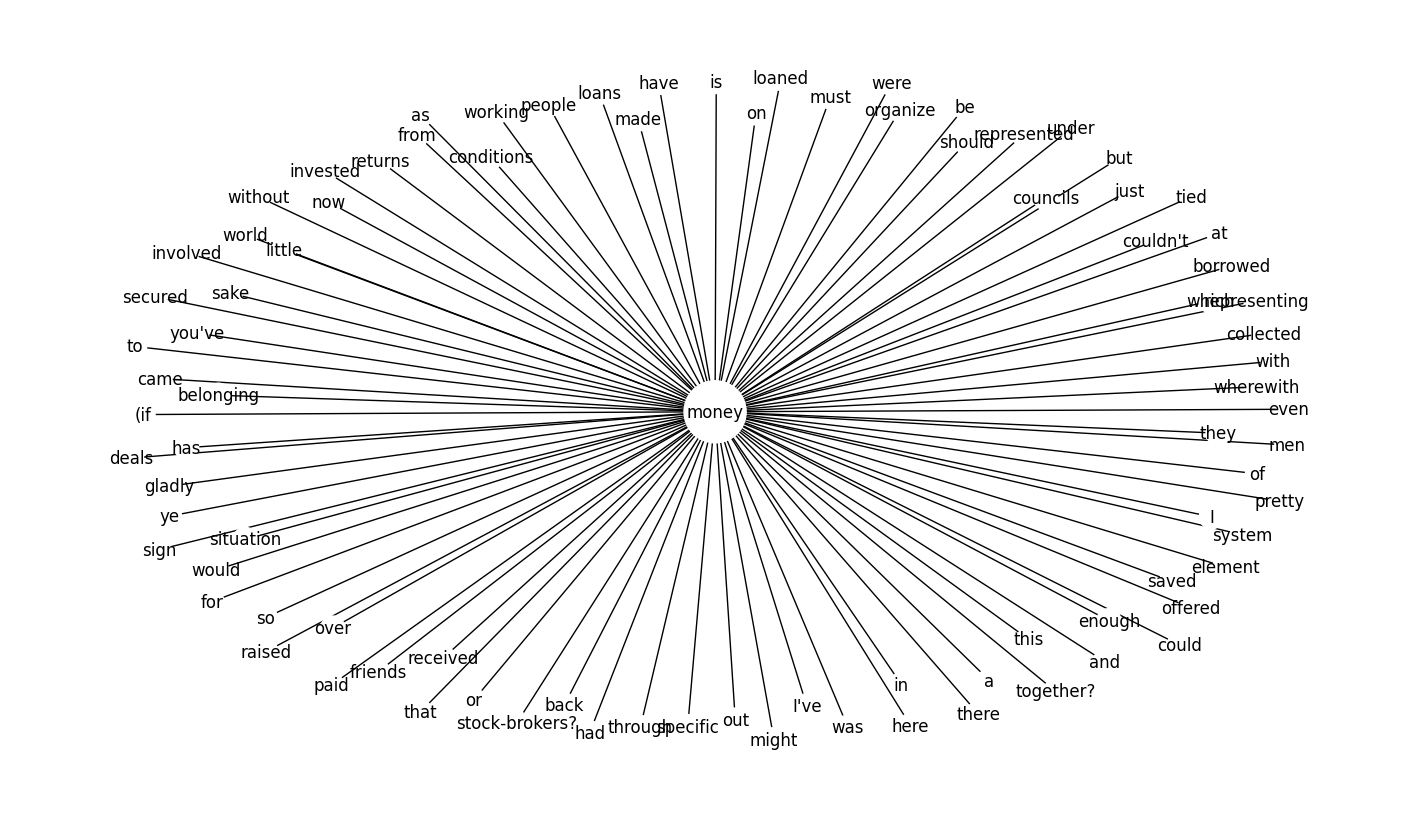

In [ ]:
sizes = [300 for i in range(len(list(graphpost.nodes)))]
sizes[0]=2000
plt.tight_layout()
plt.figure(figsize=(14,8))
# nx.draw_kamada_kawai(graphpre, arrows=True,node_color='white',with_labels=True)
nx.draw_spring(graphpost, arrows=False,node_color='white',with_labels=True,node_size=sizes)

76 76


<Figure size 640x480 with 0 Axes>

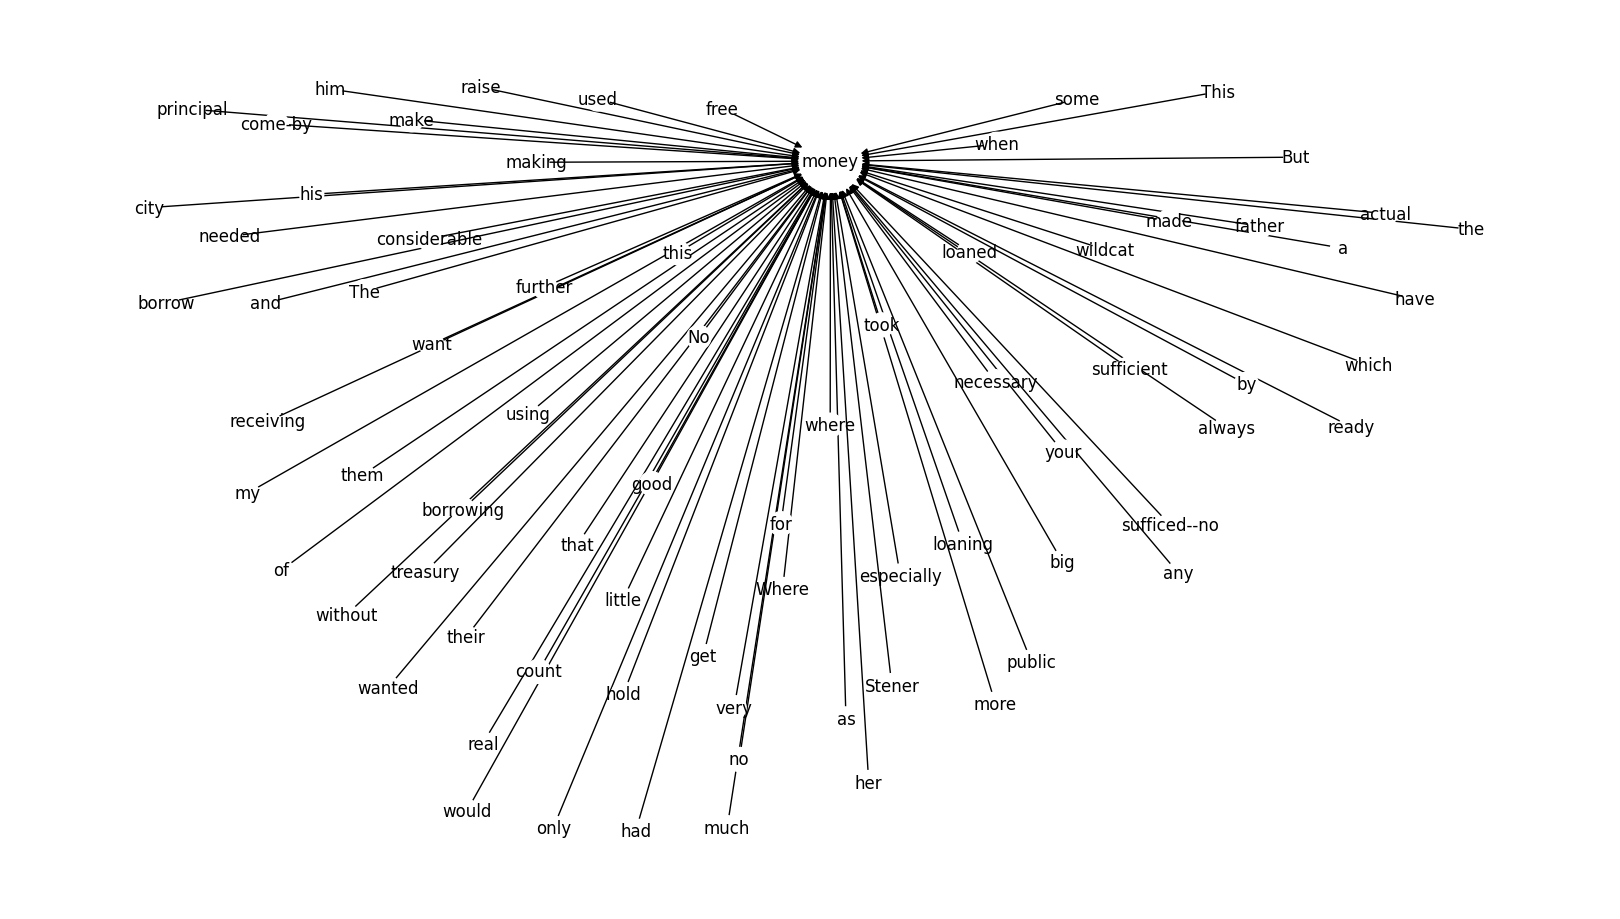

In [ ]:
sizes = [300 for i in range(len(list(graphpre.nodes)))]
sizes[1]=2000
print(len(list(graphpre.nodes)),len(sizes))
plt.tight_layout()
plt.figure(figsize=(16,9))
# nx.draw_kamada_kawai(graphpre, arrows=True,node_color='white',with_labels=True)
nx.draw_spring(graphpre, arrows=True,node_color='white',with_labels=True,node_size=sizes)

In [ ]:
import json

In [ ]:
irregulars = {}
with open('/content/drive/MyDrive/irregulars.json','r') as f:
  irregulars = json.load(f)
irregulars['abide']


[{'2': ['abode', 'abided'],
  '3': ['abode', 'abided'],
  'description': ['To continue', 'To reside', 'To live']}]

In [ ]:
irregularsP2I = {}
for word in irregulars.keys():
  irregularsP2I[irregulars[word][0]['2'][0]]=word
  irregularsP2I[irregulars[word][0]['3'][0]]=word
  if len(irregulars[word][0]['2'])==2:
    irregularsP2I[irregulars[word][0]['2'][1]]=word
irregularsP2I['is']='be'
irregularsP2I['am']='be'
irregularsP2I['are']='be'
print(irregularsP2I['were'],irregularsP2I['was'],irregularsP2I['is'],irregularsP2I['were'])

be be be be


In [ ]:
def getFromPast(word):
  if word in irregularsP2I:
    return irregularsP2I[word]
  else:
    return word

In [ ]:
getFromPast('drunk')

'drink'

In [ ]:


top30 = []

for word in count_words:
  text = nltk.word_tokenize(word[0])
  res = nltk.pos_tag(text)
  # print(res)
  try:
    res = res[0][1]
    if res!='DT' and res!='IN' and res!='PRP' and res!='PRP$' and res!= 'TO' and res!='RP' and res!='CC' and res!='RB':
      top30.append(word)
  except:
    pass




In [ ]:
top30e={}
i=0
while len(top30e)<30:
  x = getFromPast(top30[i][0])
  if x in top30e:
    top30e[x]+=top30[i][1]
  else:
    top30e[x]=top30[i][1]
  i+=1


In [ ]:
top30e

{'be': 7431,
 'have': 2859,
 'i': 1931,
 'cowperwood': 1306,
 'would': 1027,
 'which': 866,
 'could': 771,
 'will': 757,
 'one': 737,
 'what': 711,
 'do': 1146,
 'mr': 550,
 'time': 548,
 'butler': 526,
 'stener': 491,
 'who': 456,
 'see': 425,
 'say': 425,
 'when': 421,
 'more': 419,
 'city': 417,
 'aileen': 414,
 'know': 407,
 'thing': 399,
 'much': 395,
 'man': 388,
 'way': 385,
 'dont': 363,
 'might': 354,
 'how': 340}

In [ ]:
top30l = []
for word in top30e.keys():
  top30l.append((word,top30e[word]))
top30l

[('be', 7431),
 ('have', 2859),
 ('i', 1931),
 ('cowperwood', 1306),
 ('would', 1027),
 ('which', 866),
 ('could', 771),
 ('will', 757),
 ('one', 737),
 ('what', 711),
 ('do', 1146),
 ('mr', 550),
 ('time', 548),
 ('butler', 526),
 ('stener', 491),
 ('who', 456),
 ('see', 425),
 ('say', 425),
 ('when', 421),
 ('more', 419),
 ('city', 417),
 ('aileen', 414),
 ('know', 407),
 ('thing', 399),
 ('much', 395),
 ('man', 388),
 ('way', 385),
 ('dont', 363),
 ('might', 354),
 ('how', 340)]

In [ ]:
nodesTop30 = [word[0]+'\n'+str(word[1]) for word in top30l]
nodesSizes = [word[1]/10 for word in top30l]
for i in range(5):
  print(nodesTop30[i],nodesSizes[i])

be
7431 743.1
have
2859 285.9
i
1931 193.1
cowperwood
1306 130.6
would
1027 102.7


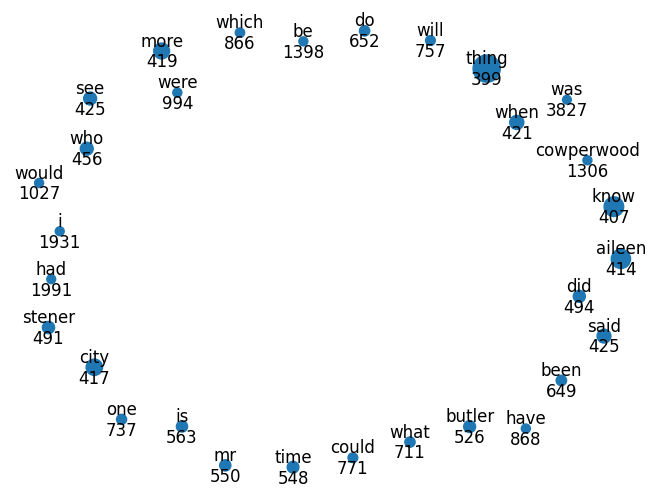

In [ ]:
topGraph = nx.Graph()
for node in nodesTop30:
  topGraph.add_node(node)
plt.tight_layout()
nx.draw(topGraph,node_size=nodesSizes[::-1],with_labels=True)

In [ ]:
!pip install circlify
import random
import circlify
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


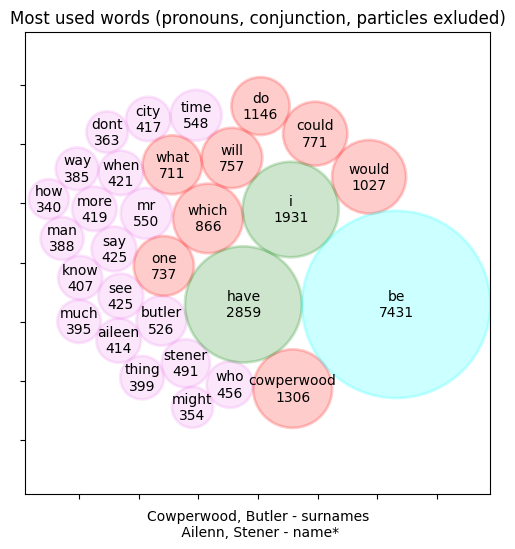

In [ ]:

# https://www.python-graph-gallery.com/circular-packing-1-level-hierarchy
# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(6,6))

# Title
ax.set_title('Most used words (pronouns, conjunction, particles exluded)')

kmeans = KMeans(n_clusters=4)
kmeans.fit(np.array(nodesSizes).reshape(-1,1))
hues = np.flip(kmeans.labels_)


# Remove axes
# ax.axis('off')
circles = circlify.circlify(
    nodesSizes, 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)
# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# colors = ['#f6160b','#0bf63d','#0b8bf6']
colors = ['red','cyan','green','violet']

for i,circle, label in zip(range(len(hues)),circles, nodesTop30[::-1]):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.2, linewidth=2, color=colors[hues[i]])) 
    plt.annotate(label,(x,y), va='center',ha='center')
# plt.xlabel(
ax.set_xlabel('Cowperwood, Butler - surnames\n Ailenn, Stener - name*',loc='center')
xt = ax.set_xticklabels(labels='')
yt = ax.set_yticklabels(labels='')
# txt = plt.Text(text='asd',verticalalignment='bottom',horizontalalignment='center',color='black',x=400,y=300)

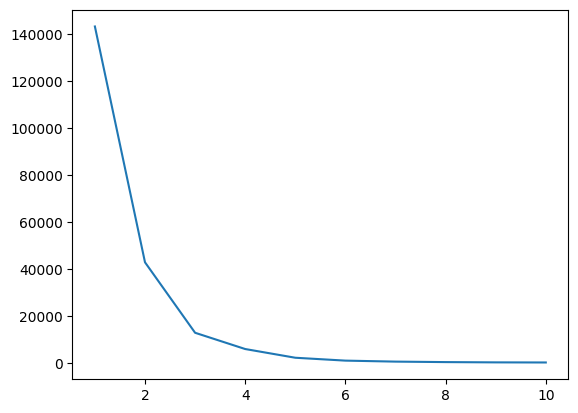

In [ ]:
# find 'elbow' number
words_scores = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(np.array(nodesSizes).reshape(-1,1))
  words_scores.append(kmeans.inertia_)
plt.plot(range(1,11),words_scores)

# New

In [ ]:
import pandas as pd
line = 'Bybit Community Fiesta: Exclusive Trading Event for India, Pakistan, and Bangladesh \xf0\x9f\x8e\x89 \xf0\x9f\x94\xa5New EDUUSDT Contract'
# line = re.sub(r"(\\x[\w][\w])","",line)
print(line)
line2 = 'Bybit Community Fiesta: Exclusive Trading Event for India, Pakistan, and Bangladesh \xf0\x9f\x8e\x89 \xf0\x9f\x94\xa5New EDUUSDT Contract'
line2 = line2.encode('utf-8').decode('ascii', 'ignore')
print(line2)

Bybit Community Fiesta: Exclusive Trading Event for India, Pakistan, and Bangladesh ð ð¥New EDUUSDT Contract
Bybit Community Fiesta: Exclusive Trading Event for India, Pakistan, and Bangladesh  New EDUUSDT Contract
